# Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will try to highlight trends & correlations observed in TMDB dataset by answering the following questions, 

- What are the key trends of movie industry over the year?
- What kind of properties are associated with high revenue movies?

____

below section can be copied to the conclusion section.

**Trends to be explored:**
- Popularity, Revenue & Runtime over the years
- Release month changes over the year
- Genres evolution over the yeaers

**Corelations to be evaluated:**

- Revenue vs. Popularity
- Release-month vs. Revenue & Popularity
- Popularity vs. Genre
- Budget vs. Genre

In [1]:
# import necessary packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configure initial settings for visualization
sns.set()

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Load / inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Identifying properties associated with different columns (min, max, percental distribution) before cleaning.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


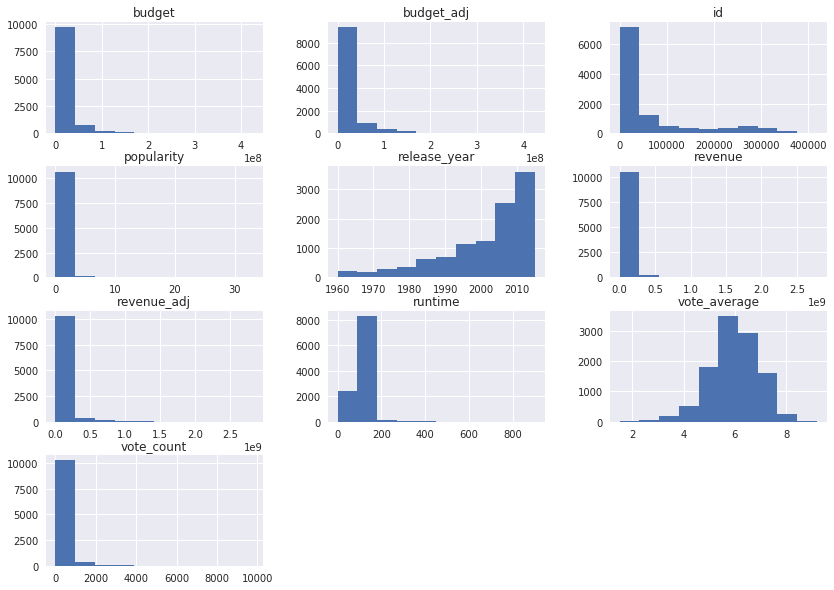

In [6]:
#visualize different columns in the data frame using histagrams.
df.hist(figsize=(14,10));

Based on initial data exploration, the following actions to be taken on different columns

- __Columns to be droped for irrelevance to investigation objectives__ 
    - `id`, `cast`, `homepage`, `keywords`, `director`, `tagline`, `overview`, `production_companies`


- __Columns to be droped for redunduncy__
    - `budget`: Already covered under `budget_adj` column
    - `revenue`: Already covered under `revenue_adj` column 


- __Columns to be manipulate & repurposed__
    - `imdb_id` to be used as index (will be usful as unique identifier of different records).
    - `release_date` to be used to create `release_month` column then droped. (to be used to identify trends assoicated with release month over the years.)



### Data Cleaning
#### Dropping redundunt / irrrelevant columns

In [7]:
# dropping irrelevant columns
df.drop(['id','cast','homepage','keywords','director','tagline','overview','production_companies'], axis=1, inplace=True)

# dropping redundunt columns
df.drop(['budget','revenue'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


#### Detect & remove duplicate rows

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

#### Detect & fill/removeNaN values

In [11]:
df.isnull().sum()

imdb_id           10
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**NaN in `imdb_id` column**

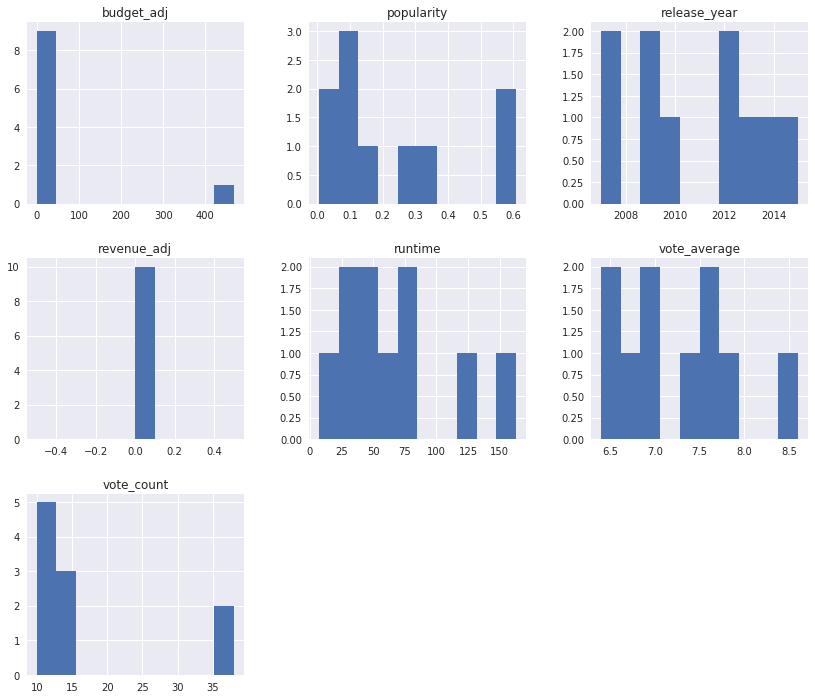

In [12]:
df[df.imdb_id.isnull()].hist(figsize=(14,12));

We found no coorelation between the NaN and any of the other properties in the datasets. Hence, it will be ok if we drop the 10 records of NaN in `imdb_id` to make sure all records have a unique identifier.

**NaN in `generes` column**

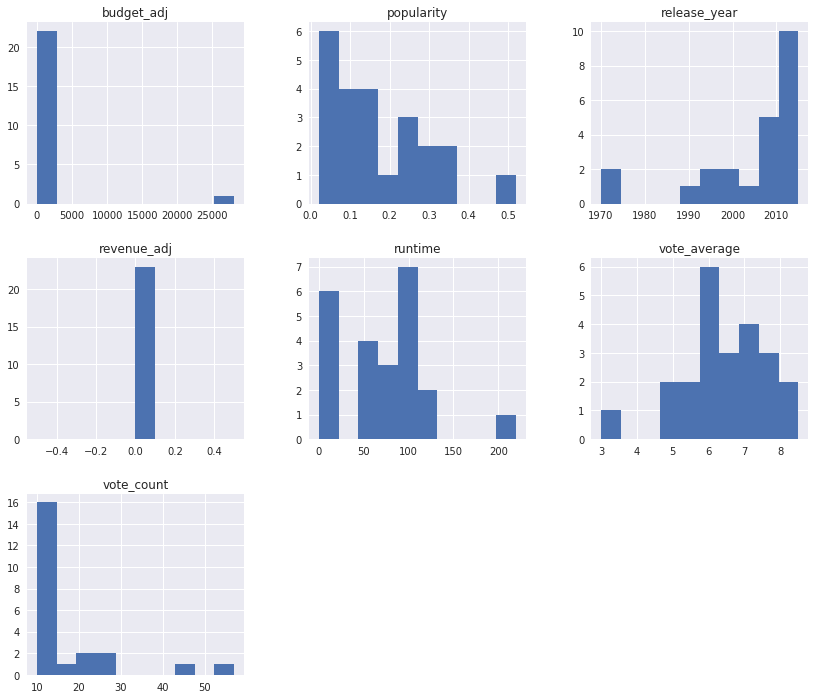

In [13]:
df[df.genres.isnull()].hist(figsize=(14,12));

We found no coorelation between the NaN and any of the other properties in the datasets. Hence, it will be ok if we drop the 23 records of NaN in `genres`.

**Dropping NaN rows**

In [14]:
df.dropna(inplace = True)
df.isnull().sum()

imdb_id           0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Manipulating columns for analysis

Create the `release_month` from `release_year` then drop `release_year`.

In [15]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.drop(['release_date'], axis=1, inplace=True)



Previous step concludes the data wrangling phase. Below is the general structure and properties of the cleaned data-set.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 11 columns):
imdb_id           10834 non-null object
popularity        10834 non-null float64
original_title    10834 non-null object
runtime           10834 non-null int64
genres            10834 non-null object
vote_count        10834 non-null int64
vote_average      10834 non-null float64
release_year      10834 non-null int64
budget_adj        10834 non-null float64
revenue_adj       10834 non-null float64
release_month     10834 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 1015.7+ KB


In [17]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04,10834.000000
mean,0.647776,102.162728,217.970833,5.973159,2001.308196,1.760011e+07,5.151599e+07,6.829149
std,1.001316,31.265059,576.368151,0.933831,12.815839,3.434371e+07,1.448190e+08,3.439508
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.208387,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.384587,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.715767,111.000000,146.000000,6.600000,2011.000000,2.094246e+07,3.389667e+07,10.000000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


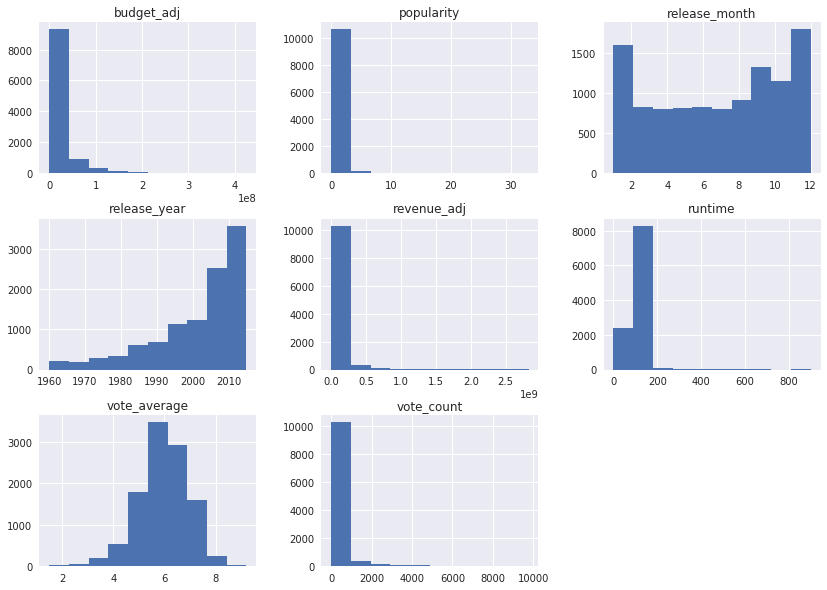

In [18]:
#visualize different columns in the data frame using histagrams.
df.hist(figsize=(14,10));

___
<a id='eda'></a>
## Exploratory Data Analysis

This investigation will try to address the following questions

- What are the key trends of movie industry over the year?
- What kind of properties are associated with high revenue movies?

### What are the key trends of movie industry over the year?
This investigation will focus on trends assoicated with Volume, Popularity, Budget, Revenue, Runtime, Release time, and Genere.

**Trends to be explored:**
- Volume, Popularity, Revenue & Runtime over the years
- Release month changes over the year
- Genres evolution over the yeaers

Analyzing the movies release volume over release year & release month.

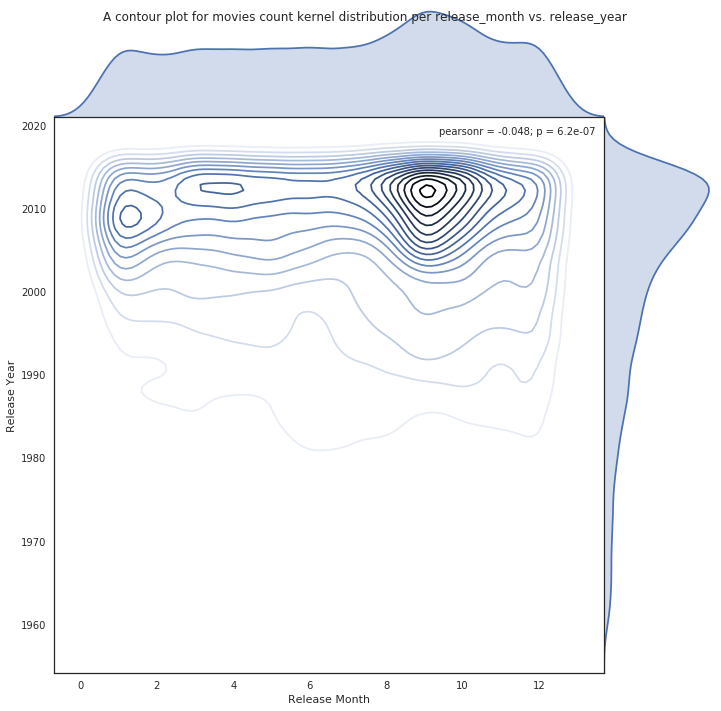

In [19]:
# Create a contour plot for release_month vs. release_year
with sns.axes_style('white'):
    ax = sns.jointplot("release_month", "release_year", df, kind='kde', 
                      size=10, space=0, shade=False, n_levels=20);
    ax.ax_joint.set_xlabel('Release Month')
    ax.ax_joint.set_ylabel('Release Year')
    ax.ax_joint.set_label('Helloworld')

    ax.fig.suptitle('A contour plot for movies count kernel distribution per release_month vs. release_year')

> Note: We didn't use `xlim` and `ylim` on above curve to have better visualization, but it has to be clear that the dataset at hand hold data for the period from **1960** to **2015** and tail drop appearing on the graph is just an __interpolation__ by the plotting tool.

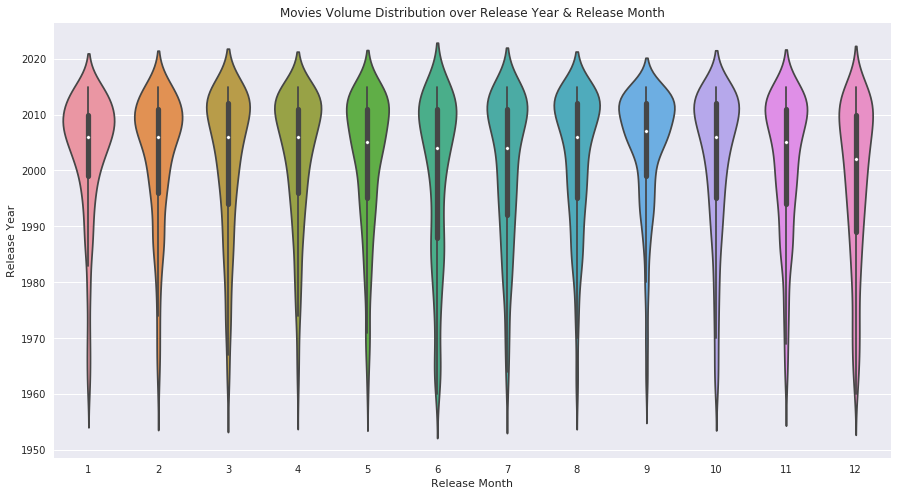

In [21]:
# Create a violin plot for release_month vs. release_year
plt.figure(figsize=(15,8))
ax = sns.violinplot("release_month", "release_year", data=df, );
plt.title('Movies Volume Distribution over Release Year & Release Month')
plt.xlabel('Release Month')
plt.ylabel('Release Year');

Couple of observations from the above diagrams, 
- This dataset inferes a significant increase in volume of movies over the years.
- A pattern change has happened to release month around the 80s-years that require further analysis.

Investigating the volume increase over years.

In [22]:
df['release_year'].describe()

count    10834.000000
mean      2001.308196
std         12.815839
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

Above IQR of `release_year` states that half of movies in this data-set have been released after 2006 (50% point).

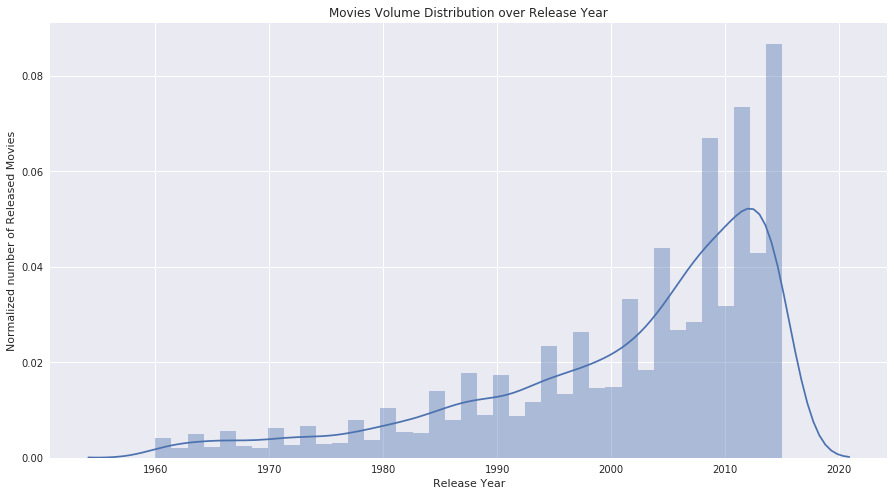

In [23]:
# Create a normalized distribution histogram with KDE assoicated with volume trends over release_years
plt.figure(figsize=(15,8))
sns.distplot(df['release_year'], kde=True, norm_hist=True)
plt.title('Movies Volume Distribution over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Normalized number of Released Movies');

Above diagram highlights two observations
- Significant increase in released movies per year in the last 15 years (2000 till 2015).
- Movies tend to be relased in bursts every couple of years.

**Investigating the pattern change of release month over years**

Create a categorical column `release_decade` from `release_year` around its x10 increments (ex. 1960s, 1970s, etc.)

In [24]:
df['release_year'].describe()

count    10834.000000
mean      2001.308196
std         12.815839
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [25]:
# Create release_decade categorical column
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
bin_names = ['1960s','1970s','1980s','1990s','2000s','2010s']
df['release_decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df['release_decade'].value_counts()

2000s    3812
2010s    3103
1990s    1857
1980s    1116
1970s     544
1960s     370
Name: release_decade, dtype: int64

Create a countor plot with kernel distribution estimation (kde) graph of movie-count per-decade vs. `release_year` and `release_month`

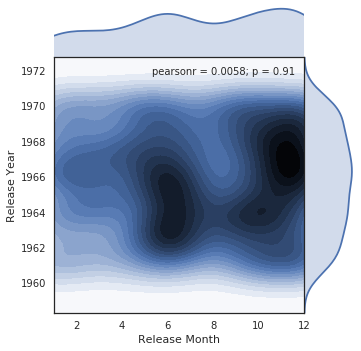

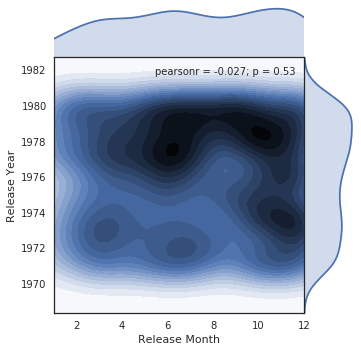

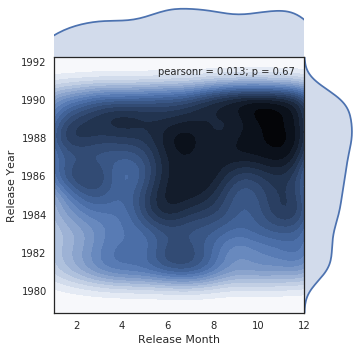

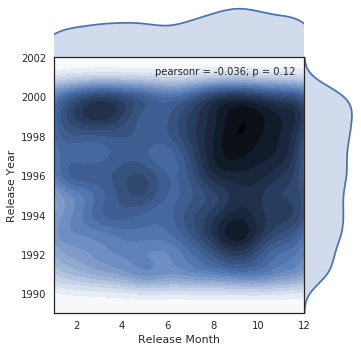

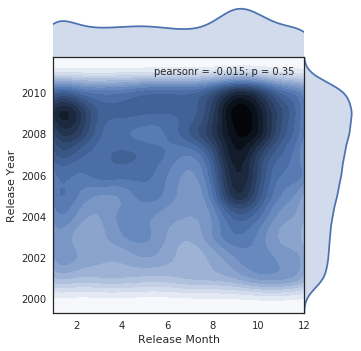

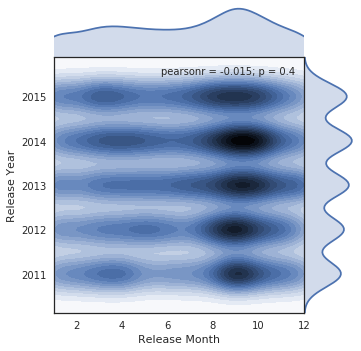

In [26]:
# Create a contour plot for release_month vs. release_decade
for decade in ['1960s','1970s','1980s','1990s','2000s','2010s']:
    query = 'release_decade == "'+decade+'"'
    with sns.axes_style('white'):
        ax = sns.jointplot("release_month", "release_year", df.query(query), kind='kde', 
                      size=5, space=0, shade=True, n_levels=20, xlim={1,12});
        ax.ax_joint.set_xlabel('Release Month')
        ax.ax_joint.set_ylabel('Release Year')

Above diagram infere couple of facts, 
- Peak of movies release has changed from first half of July to last half of June over the years.
- Spread of movies release has become narrowr over time (We will analyze this further in a later stage).

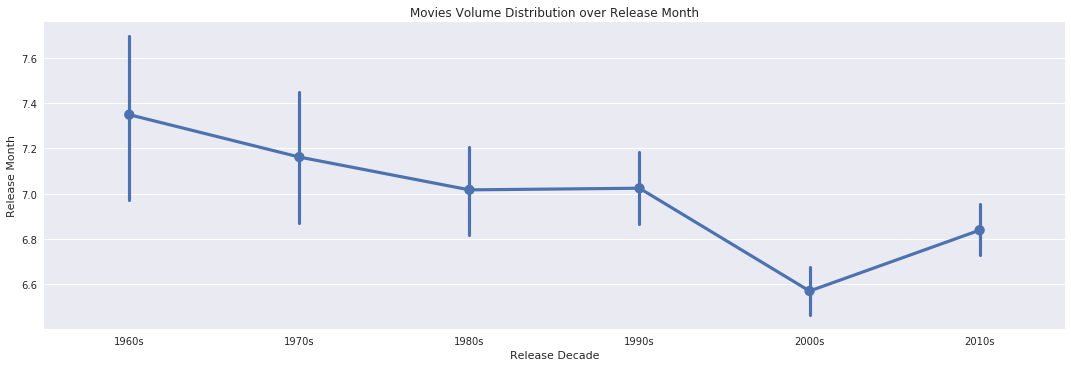

In [27]:
sns.factorplot(x="release_decade", y="release_month", data=df, 
               size=5, aspect=3);
plt.title('Movies Volume Distribution over Release Month')
plt.xlabel('Release Decade')
plt.ylabel('Release Month');

**Analyzing Popularity vs. Release time (Year/Month)**

In [28]:
df['popularity'].describe()

count    10834.000000
mean         0.647776
std          1.001316
min          0.000065
25%          0.208387
50%          0.384587
75%          0.715767
max         32.985763
Name: popularity, dtype: float64

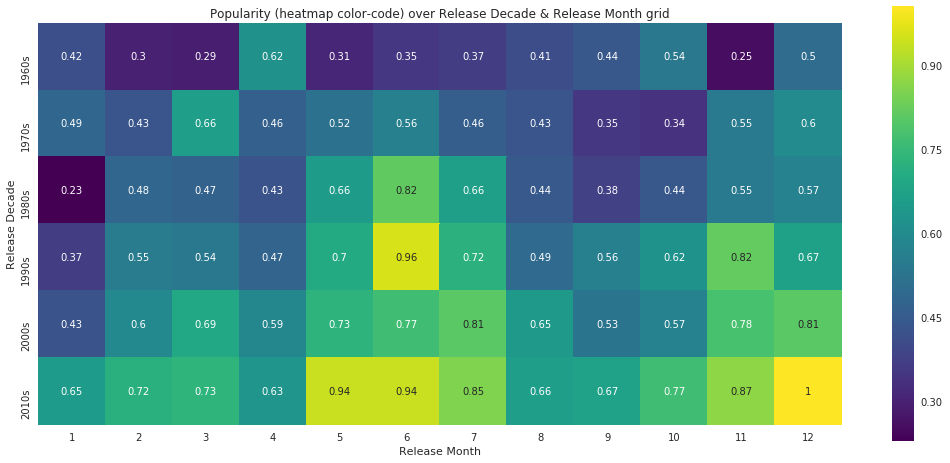

In [29]:
# Generate a pivot table from df breaking popularity over release_decade & release_month
result = df.pivot_table(index='release_decade', columns='release_month', values='popularity')

# Generate a heatmap using the created pivot table
plt.figure(figsize=(18,8))
sns.heatmap(result, annot=True, fmt=".2g", cmap='viridis', square=True);
plt.title('Popularity (heatmap color-code) over Release Decade & Release Month grid')
plt.xlabel('Release Month')
plt.ylabel('Release Decade');

Above heat map infere couple of observations, 
- Movies popularity (on average) have been increasing over the years. 
- Movies peak popularity tend to be around Spring (April) & Fall (October) during 60s and 70s. That patten has changed now to be strictly around summer (May, June, July) and Winter (November/December).

Creating a categorical column `pop_class` around `popularity` interquartile range 'IQR'.

In [30]:
# Create popularity class column
bin_edges = [0.000065,0.208387,0.384587,0.715767,32.985763]
bin_names = ['Low','Medium','High','Very High']
df['pop_class'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)
df['pop_class'].value_counts()

Very High    2709
Low          2709
High         2708
Medium       2708
Name: pop_class, dtype: int64

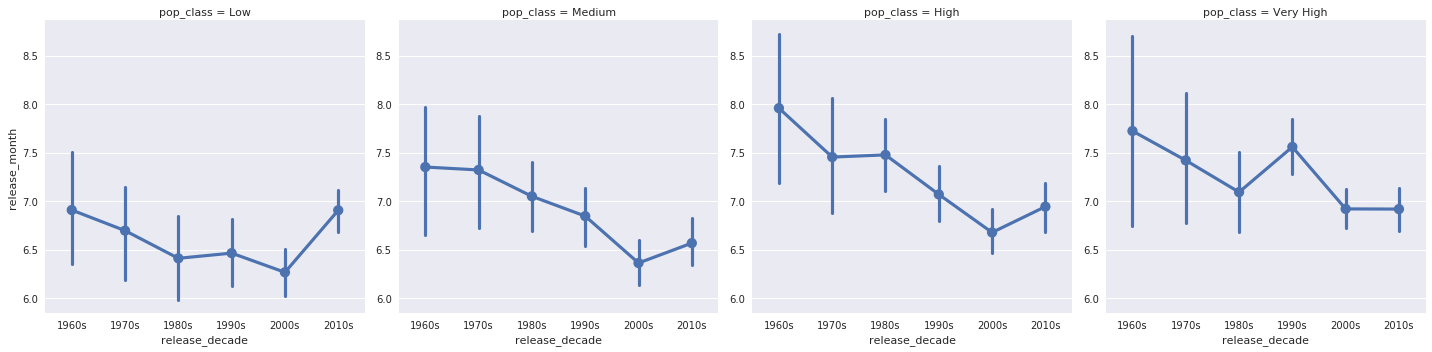

In [31]:
sns.factorplot(x="release_decade", y="release_month", data=df, col="pop_class", 
               size=5, aspect=1);

Above diagram shows that the most popular movies tend to be around wider spread of months (June, July, August) in the 60s, That patter has changed where majority of most popular movies are releasing around second half of June.

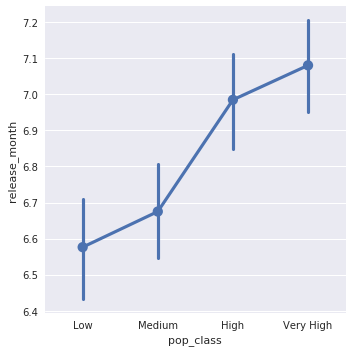

In [32]:
sns.factorplot(x="pop_class", y="release_month", data=df, 
               size=5, aspect=1);

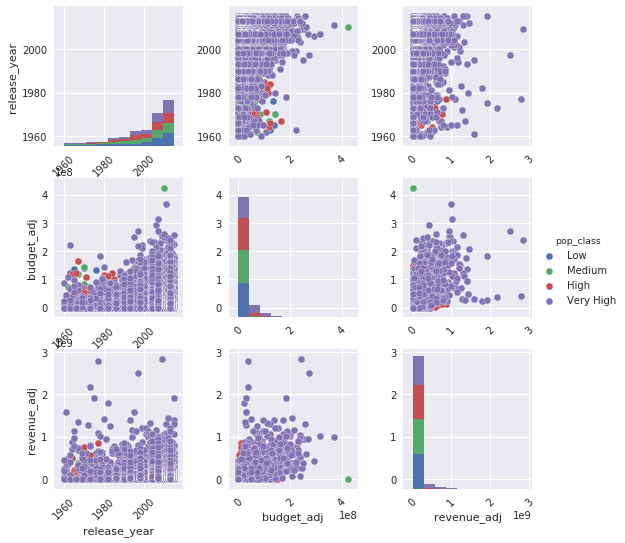

In [ ]:
g = sns.pairplot(df[["release_year", "budget_adj", "revenue_adj", "pop_class"]], hue="pop_class", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
sns.pairplot(df, size=2.5);

In [ ]:
df.plot(kind='scatter', x='runtime', y='popularity');

In [ ]:
# Create a distribution plot assoicated with volume trends over release_decade
plt.figure(figsize=(15,8))
df['release_decade'].hist()
plt.title('Movies Volume Distribution over Decades')
plt.xlabel('Release Decade')
plt.ylabel('Number of Released Movies');

### What kind of properties are associated with high revenue movies?
This investigation will define the **high revenue** levels then focus on potential correlation between reaching those revenue levels and **Relase time** (month, year), **Popularity**, **Runtime**, and **Genere**.

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

### Findings
- Movies production has been increased in volume by XXX% in the 2010s compared to the 1960s.

### Limitations
- Conclusions in this report have assumed that the provided dataset is an inclusive set to all movies released from 1960 till 2015. 

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
## UMCOMMENT the below two lines, 

#from subprocess import callb
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

REMOVE ANYTHING BELOW BEFORE SUBMISSION

**comments removed from above**, 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.